In [9]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from random import randint
%matplotlib inline

JPEG (270, 187) RGB


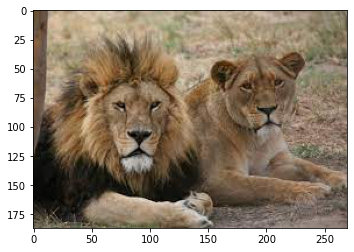

In [10]:
img1 = Image.open( "images/lion.jpeg" )
print (img1.format, img1.size, img1.mode)
imshow(np.asarray(img1))

In [12]:
img2 = Image.new("RGB", (300, 200))

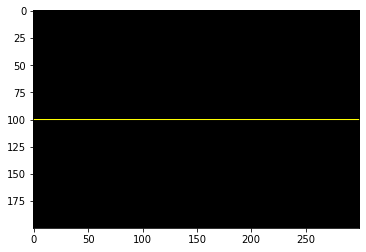

In [13]:
YELLOW = (255, 255, 0)
img2 = Image.new("RGB", (300, 200))
for i in range(img2.size[0]):
    img2.putpixel((i, 100), YELLOW) 
imshow(np.asarray(img2))

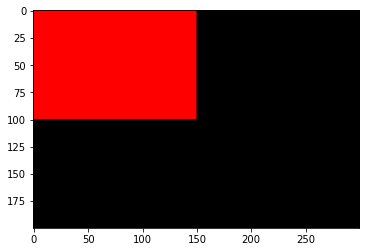

In [14]:
RED = (255, 0, 0)
img3 = Image.new("RGB", (300, 200))
for i in range(150):
    for j in range(100):
        img3.putpixel((i, j), RED)
imshow(np.asarray(img3))

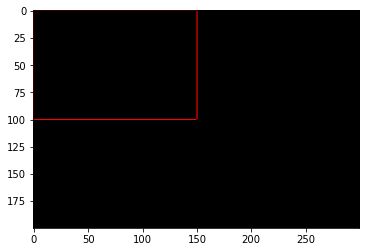

In [15]:
RED = (255, 0, 0)
img4 = Image.new("RGB", (300, 200))
for i in range(150):
        img4.putpixel((i, 0), RED)
        img4.putpixel((i, 100), RED)
for j in range(100):
        img4.putpixel((0, j), RED)
        img4.putpixel((150, j), RED)
imshow(np.asarray(img4))

In [17]:
def solidRectangle(img, x1, x2, y1, y2, couleur):
    
    for x in range(x1, x2+1):
        for y in range(y1, y2+1):
            img.putpixel((x, y), couleur)

In [18]:
def stripesColoured(img, n):
    """
    img       -> Image : Image de départ
    n         -> int   : Nombre de bandes colorées
    """
    width = img.width
    step = width//n
    for x in range(0, width, step):
        solidRectangle(img, 
                       x, x+step-1, 
                       0, img.height-1, 
                       (randint(0, 255), randint(0, 255), randint(0, 255)))

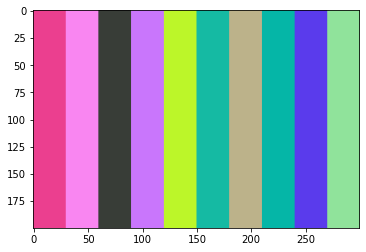

In [19]:
monImage = Image.new("RGB", (300, 200))
stripesColoured(monImage, 10)
imshow(np.asarray(monImage))

In [20]:
def stripesColoured(img, n, colors):
    """
    img       -> Image : Image de départ
    n         -> int   : Nombre de bandes colorées
    colors    -> list  : la liste des couleurs à utiliser
    """
    lencolors = len(colors)
    i = 0
    width = img.width
    step = width//n
    for x in range(0, width, step):
        solidRectangle(img, 
                       x, x+step-1, 
                       0, img.height-1, 
                       colors[i%lencolors])
        i+=1

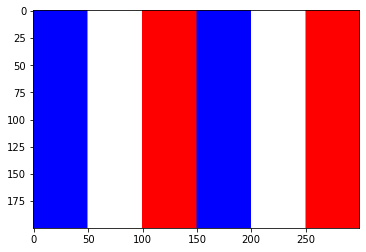

In [21]:
monImage = Image.new("RGB", (300, 200))
colors = [(0,0,255), (255,255,255), (255, 0, 0)]
stripesColoured(monImage, 6, colors)
imshow(np.asarray(monImage))

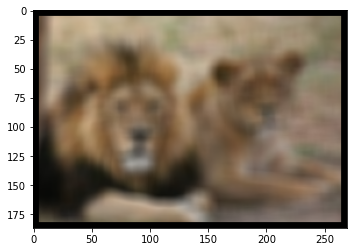

In [24]:
def blur(img, dimension):
    """
    img       -> Image : Image de départ
    dimension -> int   : Largeur du cadre (nombre impair)
    """
    imgfloue=Image.new("RGB",img.size)
    largeur, hauteur = img.size
    d = dimension // 2
    for x in range(d, largeur-d):
        for y in range(d, hauteur-d):
            r, g, b = 0, 0, 0
            for i in range(-d, d+1):
                for j in range(-d, d+1):
                    r2, g2, b2 = img.getpixel((x+i, y+j))
                    r = r + r2
                    g = g + g2
                    b = b + b2
            r = r // dimension**2
            g = g // dimension**2
            b = b // dimension**2
            imgfloue.putpixel((x, y), (r, g, b))
    return imgfloue

imageInitiale = Image.open( "images/lion.jpeg" )
imageFloue = blur(imageInitiale, 11)
imshow(np.asarray(imageFloue))

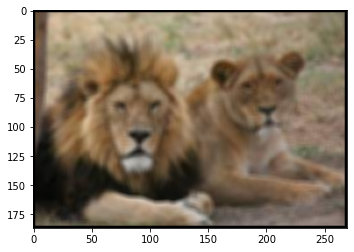

In [25]:
def blur(img, rayon):
    """
    img       -> Image : Image de départ
    rayon     -> int   : nombre de pixels entre le bord du cadre et et le centre
    """
    imgfloue=Image.new("RGB",img.size)
    largeur, hauteur = img.size
    for x in range(rayon, largeur-rayon):
        for y in range(rayon, hauteur-rayon):
            r, g, b = 0, 0, 0
            for i in range(-rayon, rayon+1):
                for j in range(-rayon, rayon+1):
                    r2, g2, b2 = img.getpixel((x+i, y+j))
                    r = r + r2
                    g = g + g2
                    b = b + b2
            r = r // (1+rayon*2)**2
            g = g // (1+rayon*2)**2
            b = b // (1+rayon*2)**2
            imgfloue.putpixel((x, y), (r, g, b))
    return imgfloue

imageInitiale = Image.open( "images/lion.jpeg" )
imageFloue = blur(imageInitiale, 2)
imshow(np.asarray(imageFloue))